In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Image loaded successfully.


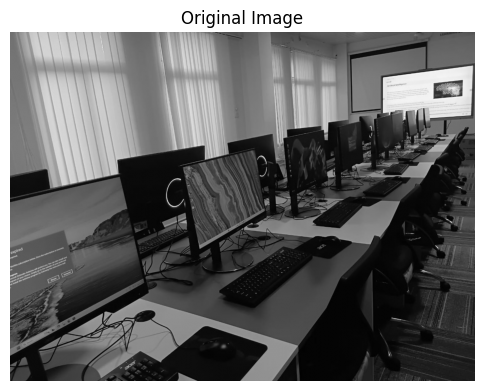

In [3]:
# Load the image
# Make sure to replace 'image.jpg' with the actual path to your image file.
# For demonstration, I'm assuming an image named 'image.jpg' is in the /content/ directory.
# If you don't have one, you can upload it or generate a dummy image.

try:
    # Attempt to read a user-provided image
    image = cv2.imread('/content/lap.jpg', cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError("Image not found at '/content/lap.jpg'. Generating a dummy image.")
except FileNotFoundError:
    # Generate a dummy image if no image is found or provided
    print("No image found at '/content/lap.jpg'. Generating a 200x200 dummy image with some noise.")
    dummy_image = np.zeros((200, 200), dtype=np.uint8)
    cv2.putText(dummy_image, "Dummy Image", (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 255, 2)
    noise = np.random.randint(0, 50, (200, 200), dtype=np.uint8)
    image = cv2.add(dummy_image, noise)


# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load the image. Please check the path.")
else:
    print("Image loaded successfully.")
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

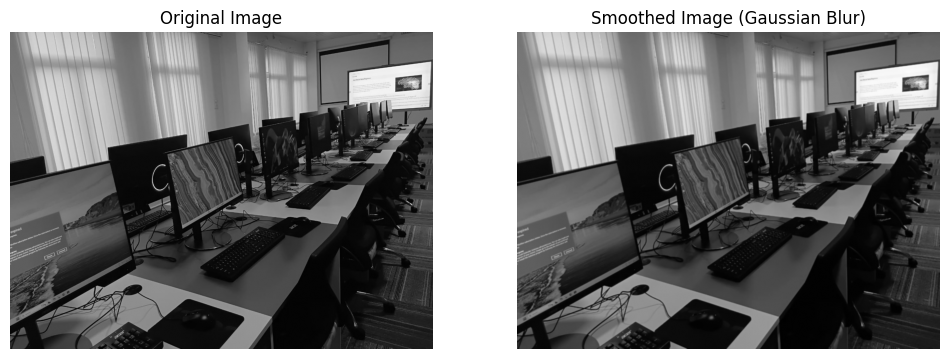

In [4]:
# Apply Gaussian blur for smoothing
# The kernel size (5, 5) determines the amount of blurring. Higher values mean more blur.
# The last argument (0) means that the standard deviation is calculated from the kernel size.
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Gaussian Blur)')
plt.axis('off')

plt.show()

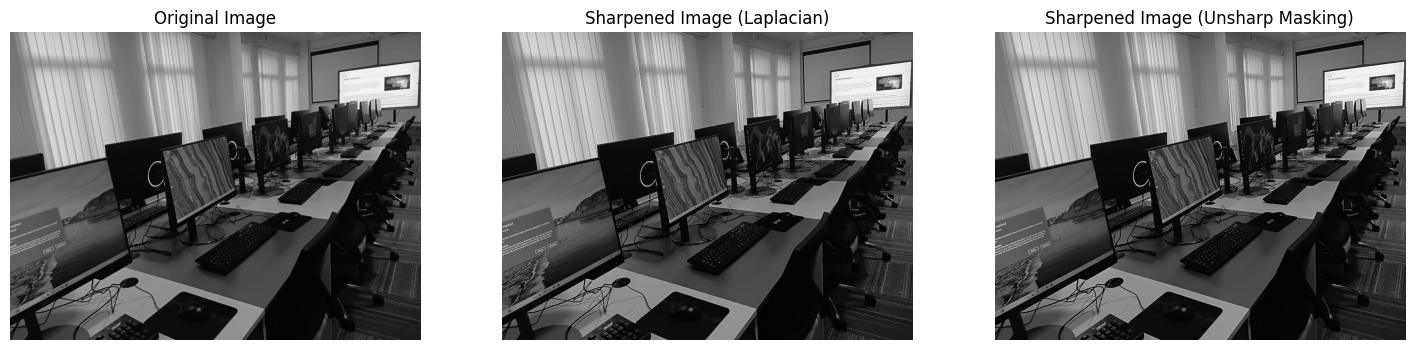

In [5]:
# 1. Apply Laplacian filter for sharpening
# The ddepth parameter is the desired depth of the destination image.
# cv2.CV_64F is used to avoid overflow when computing the Laplacian, then converted back to uint8.
laplacian = cv2.Laplacian(image, cv2.CV_64F)
sharpened_laplacian = np.uint8(np.clip(image - 0.5 * laplacian, 0, 255))

# 2. Apply Unsharp Masking
# First, create a blurred version of the image
blurred_for_unsharp = cv2.GaussianBlur(image, (9, 9), 0)

# Calculate the unsharp mask (original - blurred)
unsharp_mask = cv2.addWeighted(image, 1.5, blurred_for_unsharp, -0.5, 0)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpened_laplacian, cmap='gray')
plt.title('Sharpened Image (Laplacian)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(unsharp_mask, cmap='gray')
plt.title('Sharpened Image (Unsharp Masking)')
plt.axis('off')

plt.show()